In [14]:
import glob
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from natsort import natsorted, ns


In [2]:



d2go = glob.glob("/home/khlee/work/desmond/output/d2go/bro/d2go_bro*/output/gpcr_interface.p")
d2go.sort()
d2gi = glob.glob("/home/khlee/work/desmond/output/d2gi/bro/d2gi_bro*/output/gpcr_interface.p")
d2gi.sort()
d2go_time = glob.glob("/home/khlee/work/desmond/output/d2go/bro/d2go_bro*/ene/time.dat")
d2gi_time = glob.glob("/home/khlee/work/desmond/output/d2gi/bro/d2gi_bro*/ene/time.dat")

In [17]:
recptor="d2go"
ligand="bro"

_filein = glob.glob("/home/khlee/work/desmond/output/"+recptor+"/"+ligand+"/*/")
_filein = natsorted(_filein, key=lambda y: y.lower())
_filein

['/home/khlee/work/desmond/output/d2go/bro/d2go_bro.1/',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.2/',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.3/',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.4/',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.5/',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro/']

In [31]:
i=0
t=np.loadtxt(_filein[i]+'/ene/time.dat')
obs=pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
assert (len(t)==len(obs))



In [4]:
d2go_time

['/home/khlee/work/desmond/output/d2go/bro/d2go_bro.3/ene/time.dat',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.4/ene/time.dat',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro/ene/time.dat',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.5/ene/time.dat',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.2/ene/time.dat',
 '/home/khlee/work/desmond/output/d2go/bro/d2go_bro.1/ene/time.dat']

In [3]:
data = {"Interface":[], "System":[], "Simulation":[]}
for i in range(len(d2go)):
    i_d2go = pickle.load(open(d2go[i],"rb"))
    cat_d2go = ["d2go" for a in range(len(i_d2go))]
    i_d2gi = pickle.load(open(d2gi[i],"rb"))
    cat_d2gi = ["d2gi" for a in range(len(i_d2gi))]
    sim = ["bro.%d"%(i+1) for a in range(len(i_d2go+i_d2gi))]
    if i==5:
        sim = ["bro" for a in range(len(i_d2go+i_d2gi))]
    
    
#     with open(d2go_time[i]) as f:
#         lines_o = f.readlines()
#         lines_o = [float(lines_o[x]) for x in range(len(lines_o))]
    
#     with open(d2gi_time[i]) as g:
#         lines_i = g.readlines()
#         lines_i = [float(lines_i[x]) for x in range(len(lines_i))]
    
    data["Interface"]+=(i_d2go+i_d2gi)
    data["System"]+=(cat_d2go+cat_d2gi)
    data["Simulation"]+=(sim)

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Interface,System,Simulation
0,1639.0,d2go,bro.1
1,1579.0,d2go,bro.1
2,1567.0,d2go,bro.1
3,1539.0,d2go,bro.1
4,1579.0,d2go,bro.1
...,...,...,...
19395,1615.0,d2gi,bro
19396,1603.0,d2gi,bro
19397,1640.0,d2gi,bro
19398,1516.0,d2gi,bro


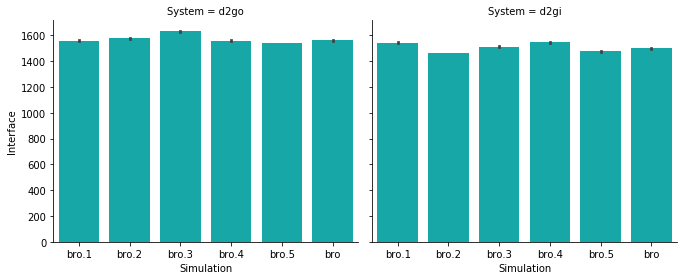

In [19]:
g = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=df, kind="bar",
                height=4, aspect=1.2);

In [20]:
d3gi_pd = glob.glob("/home/khlee/desmond/output/d3gi/pd/d3gi_pd.f*/output/gpcr_interface.p")
d3gi_pd.sort()
d3gi_prm = glob.glob("/home/khlee/desmond/output/d3gi/prm/d3gi_prm.f*/output/gpcr_interface.p")
d3gi_prm.sort()
d3go_pd = glob.glob("/home/khlee/desmond/output/d3go/pd/d3go_pd.f*/output/gpcr_interface.p")
d3go_pd.sort()
d3go_prm = glob.glob("/home/khlee/desmond/output/d3go/prm/d3go_prm.f*/output/gpcr_interface.p")
d3go_prm.sort()

In [21]:
d3_pd_data = {"Interface":[], "System":[], "Simulation":[]}
for i in range(len(d3gi_pd)):
    i_d3go = pickle.load(open(d3go_pd[i],"rb"))
    cat_d3go = ["d3go" for a in range(len(i_d3go))]
    i_d3gi = pickle.load(open(d3gi_pd[i],"rb"))
    cat_d3gi = ["d3gi" for a in range(len(i_d3gi))]
    sim = ["pd.f%d"%(i+1) for a in range(len(i_d3go+i_d3gi))]
    
    d3_pd_data["Interface"]+=(i_d3go+i_d3gi)
    d3_pd_data["System"]+=(cat_d3go+cat_d3gi)
    d3_pd_data["Simulation"]+=(sim)

In [22]:
df_pd = pd.DataFrame(d3_pd_data)

In [23]:
df_pd

,Interface,System,Simulation
0,1849.0,d3go,pd.f1
1,1796.0,d3go,pd.f1
2,1865.0,d3go,pd.f1
3,1739.0,d3go,pd.f1
4,1828.0,d3go,pd.f1
...,...,...,...
13007,1990.0,d3gi,pd.f6
13008,2057.0,d3gi,pd.f6
13009,2068.0,d3gi,pd.f6
13010,2080.0,d3gi,pd.f6


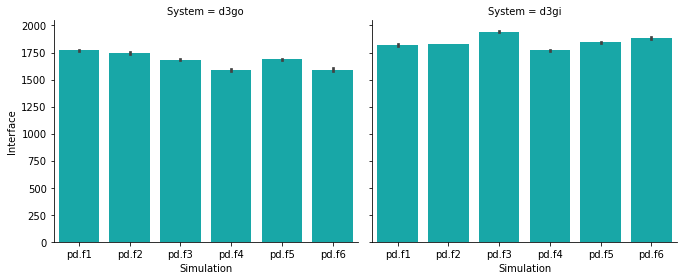

In [25]:
d3pd = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=df_pd, kind="bar",
                height=4, aspect=1.2);

In [26]:
d3_prm_data = {"Interface":[], "System":[], "Simulation":[]}
for i in range(len(d3gi_prm)):
    i_d3go = pickle.load(open(d3go_prm[i],"rb"))
    cat_d3go = ["d3go" for a in range(len(i_d3go))]
    i_d3gi = pickle.load(open(d3gi_prm[i],"rb"))
    cat_d3gi = ["d3gi" for a in range(len(i_d3gi))]
    sim = ["prm.f%d"%(i+1) for a in range(len(i_d3go+i_d3gi))]
    
    d3_prm_data["Interface"]+=(i_d3go+i_d3gi)
    d3_prm_data["System"]+=(cat_d3go+cat_d3gi)
    d3_prm_data["Simulation"]+=(sim)

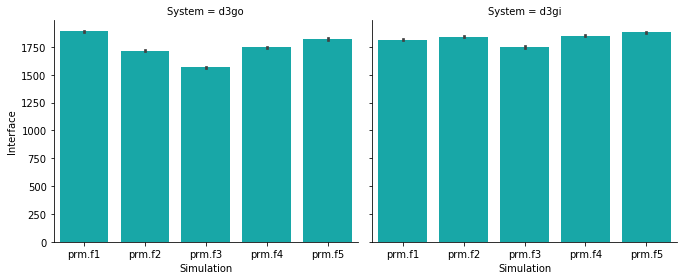

In [31]:
df_prm = pd.DataFrame(d3_prm_data)
d3prm = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=df_prm, kind="bar",
                height=4, aspect=1.2);